In [2]:
import numpy as np
import numpy.linalg as la
import pandas as pd
import matplotlib.pyplot as plt
from EDMtoolkit import *

%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [3]:
# My Functions

# Slow Feature Analysis Functions
def nonlinearBasisExpand(x):
    n = x.shape[0]
    d = x.shape[1]
    
    M = int(d+d*(d+1)/2) # number of monomials and binomials
    
    hx = np.zeros((n,M))
    hx[:,0:d] = x
    ind = d
    for i in range(d):
        xi = x[:,i]
        for j in range(i,d):
            xj = x[:,j]
            hx[:,ind] = np.multiply(xi, xj)
            ind += 1
            
    return hx

def standardize(x):
    return (x - np.mean(x[np.isfinite(x)],axis=0)) / np.std(x[np.isfinite(x)],axis=0)

def linearSimilarity(d, c): # d = column vectors of drivers, c = column vector of "color" of lyapunov spectrum
    if c.ndim == 1:
        c = c.reshape((len(c),1))
    if d.ndim == 1:
        d = d.reshape((len(d),1))
        
    finiteVals = np.logical_and(np.all(np.isfinite(d),axis=1),np.all(np.isfinite(c),axis=1))
    dNoNAs = d[finiteVals]
    cNoNAs = c[finiteVals]
    
    dinv = la.inv(dNoNAs.T @ dNoNAs) @ dNoNAs.T
    k = dinv @ cNoNAs
    
    return (k, timeSeriesSimilarity((dNoNAs @ k).flatten(), cNoNAs.flatten()))

def timeSeriesSimilarity(t1, t2):
    return abs(np.dot(t1,t2) / (la.norm(t1) * la.norm(t2)))

In [ ]:
#
locations = [""]

In [6]:
file = "../Datasets/sitemetadata.csv"
data = pd.read_csv(file, encoding="utf-8", na_filter=False)
print(data)

                     Site             Country    Type RestrictedUse      Lat  \
0       Blelham Tarn (UK)             England    Lake            no  54.3950   
1    Esthwaite Water (UK)             England    Lake            no  54.3600   
2   Windermere North (UK)             England    Lake            no  54.3700   
3        Lake Apopka (FL)   FL, United States    Lake            no  28.6260   
4     Lake Beauclair (FL)   FL, United States    Lake            no  28.7730   
5          Lake Dora (FL)   FL, United States    Lake            no  28.7880   
6        Lake Eustis (FL)   FL, United States    Lake            no  28.8470   
7       Lake Griffin (FL)   FL, United States    Lake            no  28.8830   
8        Lake Harris (FL)   FL, United States    Lake            no  28.7780   
9          Lake Yale (FL)   FL, United States    Lake            no  28.9120   
10        Lake Greifensee         Switzerland    Lake            no  47.3500   
11            Lake Geneva  Switzerland/F

In [7]:
file = "../Datasets/alldata.csv"
data = pd.read_csv(file,encoding="utf-8",na_filter=False)
data = data.astype({"Abundance" : float})
print(data.info())

# print(data.isna().sum())

pd.option_context("display.max_rows","display.max_columns")

data.drop(["Level"],1,inplace=True)
# data.set_index(["Site","Month","Year"],inplace=True)
# display(data.query("Site == ['Lake Apopka (FL)'] and "))

for site in data["Site"].drop_duplicates():
    for species in data.query("Site == ['{s}']".format(s=site))["Name"].drop_duplicates():
        s = data.query("Site == ['{s}'] and Name == ['{n}']".format(s=site,n=species))
        print("len = {le}, NAs = {nas} : {l} population of {s} ".format(s=species,l=site, le=len(s), nas=s["Abundance"].isna().sum()) )

# Lake Geneva has alot of data points, some NAs, is not restricted use, but has crap temperature data
# Esthwaite Water Zooplankton has almost 0 NAs, good temp data, is of reasonable size, and is not restricted use - BINGO

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175085 entries, 0 to 175084
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Site       175085 non-null  object 
 1   Year       175085 non-null  int64  
 2   Month      175085 non-null  int64  
 3   Name       175085 non-null  object 
 4   Abundance  142755 non-null  float64
 5   Level      175085 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 6.0+ MB
None
len = 324, NAs = 24 : Blelham Tarn (UK) population of Chla 
len = 324, NAs = 14 : Blelham Tarn (UK) population of Zooplankton 
len = 395, NAs = 12 : Esthwaite Water (UK) population of Chla 
len = 395, NAs = 2 : Esthwaite Water (UK) population of Zooplankton 
len = 395, NAs = 25 : Windermere North (UK) population of copepod 
len = 395, NAs = 25 : Windermere North (UK) population of large.clad 
len = 395, NAs = 25 : Windermere North (UK) population of small.clad 
len = 395, NAs = 11 : Winderm

c:\users\kenneth gee\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # Remove the CWD from sys.path while we load stuff.


len = 212, NAs = 15 : Lake Apopka (FL) population of clad 
len = 212, NAs = 20 : Lake Apopka (FL) population of copepod 
len = 212, NAs = 6 : Lake Apopka (FL) population of Chla 
len = 212, NAs = 20 : Lake Apopka (FL) population of Zooplankton 
len = 211, NAs = 22 : Lake Beauclair (FL) population of clad 
len = 211, NAs = 27 : Lake Beauclair (FL) population of copepod 
len = 211, NAs = 9 : Lake Beauclair (FL) population of Chla 
len = 211, NAs = 27 : Lake Beauclair (FL) population of Zooplankton 
len = 212, NAs = 28 : Lake Dora (FL) population of clad 
len = 212, NAs = 33 : Lake Dora (FL) population of copepod 
len = 212, NAs = 20 : Lake Dora (FL) population of Chla 
len = 212, NAs = 33 : Lake Dora (FL) population of Zooplankton 
len = 208, NAs = 21 : Lake Eustis (FL) population of clad 
len = 208, NAs = 26 : Lake Eustis (FL) population of copepod 
len = 208, NAs = 43 : Lake Eustis (FL) population of Chla 
len = 208, NAs = 26 : Lake Eustis (FL) population of Zooplankton 
len = 210, NAs

len = 477, NAs = 15 : Lake Muggelsee population of Mesocyclops leuckarti 
len = 477, NAs = 15 : Lake Muggelsee population of Polyarthra dolichoptera 
len = 477, NAs = 15 : Lake Muggelsee population of Polyarthra dolichoptera-vulgaris-Group 
len = 477, NAs = 15 : Lake Muggelsee population of Polyarthra spp.  
len = 477, NAs = 15 : Lake Muggelsee population of Pompholyx sulcata 
len = 477, NAs = 15 : Lake Muggelsee population of Rotifers spp. 
len = 477, NAs = 15 : Lake Muggelsee population of Synchaeta oblonga 
len = 477, NAs = 15 : Lake Muggelsee population of Synchaeta pectinata 
len = 477, NAs = 15 : Lake Muggelsee population of Synchaeta spp.  
len = 477, NAs = 15 : Lake Muggelsee population of Trichocerca similis 
len = 305, NAs = 128 : Narragansett Bay population of Zooplankton 
len = 305, NAs = 18 : Narragansett Bay population of Chla 
len = 305, NAs = 137 : Narragansett Bay population of Acartia.hudsonica 
len = 305, NAs = 137 : Narragansett Bay population of Acartia.tonsa 
len 

len = 248, NAs = 138 : Strait of Georgia population of Calanoids.less1mm 
len = 248, NAs = 136 : Strait of Georgia population of Calanoids.1to3mm 
len = 248, NAs = 150 : Strait of Georgia population of Calanoids.3to5mm 
len = 248, NAs = 150 : Strait of Georgia population of Calanoids.greater5mm 
len = 248, NAs = 138 : Strait of Georgia population of Total.Euphausiids.less1.cm 
len = 248, NAs = 138 : Strait of Georgia population of E.pacifica.less1cm 
len = 248, NAs = 138 : Strait of Georgia population of Thysanoessa.less1cm 
len = 248, NAs = 136 : Strait of Georgia population of Gammarids 
len = 248, NAs = 136 : Strait of Georgia population of Hyperiids 
len = 248, NAs = 136 : Strait of Georgia population of Ostracods 
len = 248, NAs = 169 : Strait of Georgia population of Shrimps 
len = 248, NAs = 169 : Strait of Georgia population of Crab.larvae 
len = 248, NAs = 136 : Strait of Georgia population of Chaetognaths 
len = 248, NAs = 136 : Strait of Georgia population of Pteropods 
len 

len = 440, NAs = 160 : Trout Lake (WI) population of SYNCHAETA 
len = 440, NAs = 172 : Trout Lake (WI) population of Chla 
len = 440, NAs = 160 : Trout Lake (WI) population of Zooplankton 


In [12]:
# INSERT LOCATION AND SPECIES #

location = "Lake Kasumigaura"
species = "Zooplankton"

In [13]:
EWdata

array([], dtype=float64)

9
9
9


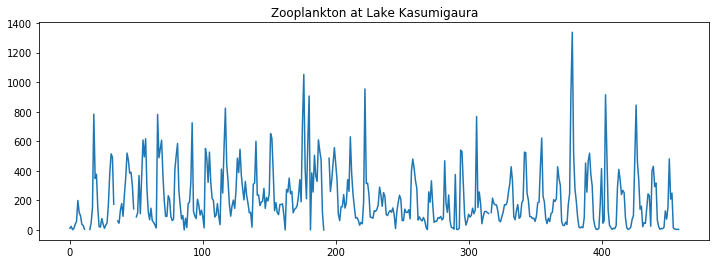

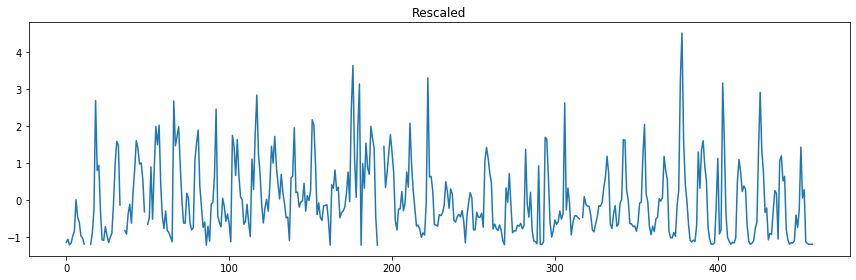

In [15]:
np.set_printoptions(precision=4, suppress=True)

EWdata = data.query("Site == ['{loc}'] and Name == ['{n}']".format(loc=location, n=species))["Abundance"].to_numpy()

"""
for species in EWdata["Name"].drop_duplicates():
    axWater[i].set_title("{s} at {l}".format(s=species,l=location))
    axWater[i].plot(EWdata.query("Name == ['{n}']".format(n=species))["Abundance"].to_numpy());
    i += 1
"""

print(np.sum(np.isnan(EWdata)))
Xr = EWdata - np.nanmin(EWdata) + 1
# Xr = EWdata + np.std( EWdata, axis = 0, where=np.isfinite(EWdata))
print(np.sum(np.isnan(EWdata)))

# Xr = standardize(np.sqrt(Xr, where = np.isfinite(Xr)))
Xr = standardize(np.log2(Xr + 1000, where = np.isfinite(Xr+1000), out=Xr) + 1)
# Xr = Xr ** (1/10)
print(np.sum(np.isnan(Xr)))
# Xr = standardize(np.log(Xr, where = np.logical_and(np.isfinite(Xr), np.not_equal(Xr, Xr*0))))
# Now try without log transform
Xr = standardize(Xr) # RESULT - WORKS MUCH MORE CLEANLY WITH LOG TRANSFORM
# Xr = Xr[:175]
Xr = Xr.reshape(len(Xr),1)

t = np.linspace(0,1,num=len(Xr))

ngraphs = 1
figWater, axWater = plt.subplots(ngraphs, figsize=(12,4*ngraphs))
# for location in data.index.levels[0][:3]:
axWater.set_title("{s} at {l}".format(s=species,l=location))
# axWater.plot(EWdata.query("Name == ['{n}']".format(n=species))["Abundance"].to_numpy());
axWater.plot(EWdata);

figPlank, axPlank = plt.subplots(figsize=(12,4))
axPlank.plot(Xr)
axPlank.set_title("Rescaled")
 
plt.tight_layout()
plt.show()

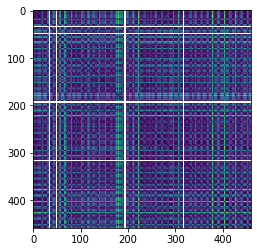

In [16]:
plt.imshow(distanceMatrix(Xr))
plt.show()

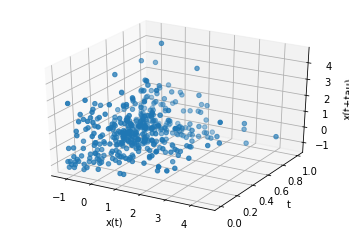

In [17]:
poincareT(Xr, step=3)

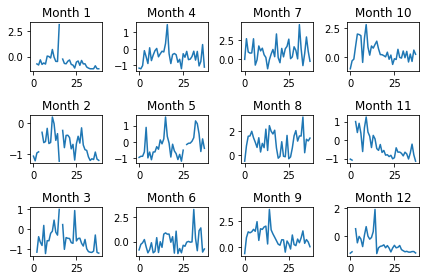

In [18]:
fig, ax = plt.subplots(ncols=4,nrows=3)
for i in range(12):
    ax[i%3,int(i/3)].plot(Xr[i::12])
    ax[i%3,int(i/3)].set_title(f"Month {i+1}")
       
plt.tight_layout()
plt.show()

ValueError: object too deep for desired array

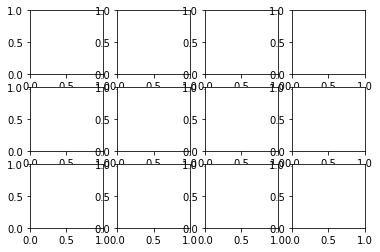

In [19]:
fig, ax = plt.subplots(ncols=4,nrows=3)
for i in range(12):
    ax[i%3,int(i/3)].plot(np.convolve(Xr[i::12], np.array([0,0,1,1,1,0,0])))
    
plt.tight_layout()
plt.show()

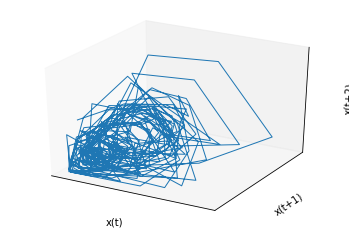

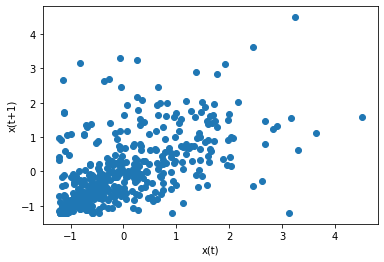

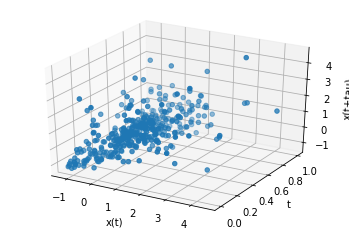

In [20]:
poincare3d(Xr, scatter=False)
poincare2d(Xr)
poincareT(Xr)

NAs at Blelham Tarn (UK) = 5
NAs at Esthwaite Water (UK) = 1
NAs at Windermere North (UK) = 0
NAs at Lake Apopka (FL) = 6
NAs at Lake Beauclair (FL) = 10
NAs at Lake Dora (FL) = 18
NAs at Lake Eustis (FL) = 43
NAs at Lake Griffin (FL) = 11
NAs at Lake Harris (FL) = 28
NAs at Lake Yale (FL) = 57
NAs at Lake Greifensee = 43
NAs at Lake Geneva = 79
NAs at Lake Kasumigaura = 12
NAs at Lake Mendota (WI) = 121
NAs at Loch Leven = 212
NAs at Lake Zurich = 53
NAs at Lake Muggelsee = 47
NAs at Narragansett Bay = 2
NAs at Lake Taupo = 15
NAs at Oneida Lake = 282
NAs at Big Muskellunge (WI) = 159
NAs at Crystal Bog (WI) = 172
NAs at Crystal Lake (WI) = 113
NAs at Sparkling Lake (WI) = 150
NAs at Trout Lake (WI) = 164


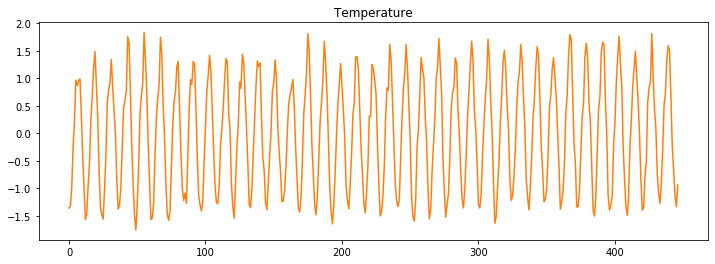

In [21]:
# Read out driver

file = "../Datasets/temperaturedata.csv"
driverData = pd.read_csv(file, encoding="utf-8", na_filter = True)
driverR = driverData.query("Site == ['{loc}']".format(loc=location))["Temp"].to_numpy()
driverR = driverR.reshape(len(driverR),1)
driverR = standardize(driverR)

driverR = driverR[:Xr.shape[0]]

for location in driverData["Site"].drop_duplicates():
    nNAs = np.sum(np.isnan(driverData.query("Site == ['{loc}']".format(loc=location))["Temp"]))
    print("NAs at {loc} = {nna}".format(loc = location, nna = nNAs))

figDr, axDr = plt.subplots(figsize = (12,4))
axDr.plot(driverR, color="tab:orange")
axDr.set_title("Temperature")
plt.show()

Null Correlation =  0.5931247670232195


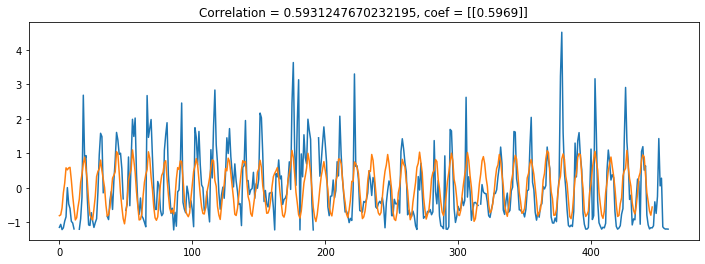

In [22]:
# Correlation between driver and original unaltered data
k, sim = linearSimilarity(driverR, Xr)
figCorr, axCorr = plt.subplots(1,figsize=(12,4))

axCorr.plot(Xr)
axCorr.plot(driverR @ k)
axCorr.set_title("Correlation = {c}, coef = {K}".format(c=sim, K=k))

print("Null Correlation = ", sim)

plt.show()

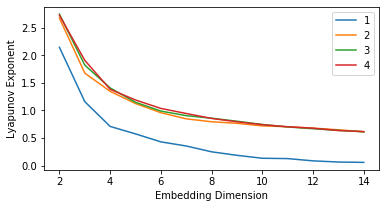

In [23]:
# False Nearest Neighbors Test

# Unitary Embedding Testing

FNNplot(Xr,12, 4)


AttributeError: 'numpy.ndarray' object has no attribute 'isnan'

In [27]:
horizon = 1
numLags = 1
lagStep = 1
maxLags = 12
minLags = 0


In [28]:
thetaNS, deltaNS, llikelihoodNS, lagsNS, thetaS, llikelihoodS, lagsS = optimizationSuite(Xr, t, horizon, maxLags, lagStep, minLags=minLags, errFunc=logUnLikelihood)

Embedding Dimension = 2
NSMap


LinAlgError: SVD did not converge

In [ ]:
[False False]
[01] theta: 0.000, delta: 0.000, log Likelihood: -686.591
[02] theta: 0.000, delta: 1.100, log Likelihood: -685.939
[03] theta: 0.000, delta: 2.310, log Likelihood: -685.993
[04] theta: 0.000, delta: 1.705, log Likelihood: -685.914
[05] theta: 0.000, delta: 1.040, log Likelihood: -685.950
[06] theta: 0.000, delta: 1.372, log Likelihood: -685.910
[07] theta: 0.000, delta: 1.738, log Likelihood: -685.916
[False  True]
[01] theta: 0.000, delta: 0.000, log Likelihood: -686.591
[02] theta: 0.000, delta: 0.000, log Likelihood: -686.591
[False False]
[01] theta: 0.000, delta: 0.000, log Likelihood: -672.692
[02] theta: 1.100, delta: 1.100, log Likelihood: -671.310
[03] theta: 0.550, delta: 0.550, log Likelihood: -670.728
[04] theta: 0.825, delta: 0.825, log Likelihood: -670.666
[05] theta: 0.688, delta: 1.128, log Likelihood: -670.448
[06] theta: 0.536, delta: 1.460, log Likelihood: -670.317
[07] theta: 0.370, delta: 1.826, log Likelihood: -670.291
[08] theta: 0.453, delta: 1.643, log Likelihood: -670.290
[False  True]
[01] theta: 0.000, delta: 0.000, log Likelihood: -672.692
[02] theta: 1.100, delta: 0.000, log Likelihood: -671.697
[03] theta: 0.550, delta: 0.000, log Likelihood: -671.544
[04] theta: 0.825, delta: 0.000, log Likelihood: -671.446
[05] theta: 0.688, delta: 0.000, log Likelihood: -671.453
[False False]
[01] theta: 0.000, delta: 0.000, log Likelihood: -643.567
[02] theta: 1.100, delta: 1.100, log Likelihood: -639.774
[03] theta: 0.550, delta: 0.550, log Likelihood: -639.658
[04] theta: 0.825, delta: 0.825, log Likelihood: -639.133
[05] theta: 0.688, delta: 1.128, log Likelihood: -638.922
[06] theta: 0.536, delta: 1.460, log Likelihood: -638.891
[07] theta: 0.612, delta: 1.826, log Likelihood: -638.844
[08] theta: 0.574, delta: 1.643, log Likelihood: -638.839
[False  True]
[01] theta: 0.000, delta: 0.000, log Likelihood: -643.567
[02] theta: 1.100, delta: 0.000, log Likelihood: -640.579
[03] theta: 0.550, delta: 0.000, log Likelihood: -641.024
[04] theta: 0.825, delta: 0.000, log Likelihood: -640.494
[05] theta: 1.128, delta: 0.000, log Likelihood: -640.625
[06] theta: 0.976, delta: 0.000, log Likelihood: -640.459
[07] theta: 0.810, delta: 0.000, log Likelihood: -640.508
[08] theta: 0.893, delta: 0.000, log Likelihood: -640.455
[09] theta: 0.985, delta: 0.000, log Likelihood: -640.463
[False False]
[01] theta: 0.000, delta: 0.000, log Likelihood: -632.244
[02] theta: 1.100, delta: 1.100, log Likelihood: -624.828
[03] theta: 0.550, delta: 2.310, log Likelihood: -624.264
[04] theta: 0.825, delta: 1.705, log Likelihood: -624.071
[05] theta: 0.688, delta: 1.040, log Likelihood: -624.468
[06] theta: 0.756, delta: 1.372, log Likelihood: -624.101
[07] theta: 0.832, delta: 1.738, log Likelihood: -624.085
[08] theta: 0.794, delta: 1.555, log Likelihood: -624.045
[09] theta: 0.752, delta: 1.647, log Likelihood: -624.031
[10] theta: 0.773, delta: 1.747, log Likelihood: -624.032
[False  True]
[01] theta: 0.000, delta: 0.000, log Likelihood: -632.244
[02] theta: 1.100, delta: 0.000, log Likelihood: -626.670
[03] theta: 0.550, delta: 0.000, log Likelihood: -627.970
[04] theta: 0.825, delta: 0.000, log Likelihood: -626.843
[05] theta: 1.128, delta: 0.000, log Likelihood: -626.713
[06] theta: 0.976, delta: 0.000, log Likelihood: -626.616
[07] theta: 1.052, delta: 0.000, log Likelihood: -626.622
[False False]
[01] theta: 0.000, delta: 0.000, log Likelihood: -624.949
[02] theta: 1.100, delta: 1.100, log Likelihood: -617.507
[03] theta: 0.550, delta: 2.310, log Likelihood: -615.669
[04] theta: 0.825, delta: 1.705, log Likelihood: -615.900
[05] theta: 0.688, delta: 1.040, log Likelihood: -616.135
[06] theta: 0.756, delta: 1.372, log Likelihood: -615.794
[07] theta: 0.722, delta: 1.738, log Likelihood: -615.647
[08] theta: 0.684, delta: 2.141, log Likelihood: -615.646
[False  True]
[01] theta: 0.000, delta: 0.000, log Likelihood: -624.949
[02] theta: 1.100, delta: 0.000, log Likelihood: -619.752
[03] theta: 0.550, delta: 0.000, log Likelihood: -620.324
[04] theta: 0.825, delta: 0.000, log Likelihood: -619.390
[05] theta: 1.128, delta: 0.000, log Likelihood: -619.872
[06] theta: 0.976, delta: 0.000, log Likelihood: -619.407
[07] theta: 0.810, delta: 0.000, log Likelihood: -619.410
[False False]
[01] theta: 0.000, delta: 0.000, log Likelihood: -625.529
[02] theta: 1.100, delta: 1.100, log Likelihood: -619.411
[03] theta: 0.550, delta: 0.550, log Likelihood: -617.678
[04] theta: 0.825, delta: 0.825, log Likelihood: -617.055
[05] theta: 0.688, delta: 1.128, log Likelihood: -616.425
[06] theta: 0.536, delta: 1.460, log Likelihood: -616.266
[07] theta: 0.612, delta: 1.826, log Likelihood: -616.185
[08] theta: 0.574, delta: 1.643, log Likelihood: -616.163
[09] theta: 0.593, delta: 1.735, log Likelihood: -616.159
[False  True]
[01] theta: 0.000, delta: 0.000, log Likelihood: -625.529
[02] theta: 1.100, delta: 0.000, log Likelihood: -620.506
[03] theta: 0.550, delta: 0.000, log Likelihood: -620.044
[04] theta: 0.825, delta: 0.000, log Likelihood: -619.380
[05] theta: 0.688, delta: 0.000, log Likelihood: -619.512
[06] theta: 0.756, delta: 0.000, log Likelihood: -619.393
[07] theta: 0.832, delta: 0.000, log Likelihood: -619.385
[[685.9161   0.       1.7383   0.    ]
 [670.2898   0.4531   1.6433   1.    ]
 [638.8387   0.5741   1.6433   2.    ]
 [624.0323   0.7733   1.7474   3.    ]
 [615.6464   0.6841   2.1409   4.    ]
 [616.1591   0.593    1.7348   5.    ]]
[[686.5914   0.       0.    ]
 [671.4533   0.6875   1.    ]
 [640.463    0.9846   2.    ]
 [626.6222   1.0519   3.    ]
 [619.4104   0.8099   4.    ]
 [619.3849   0.8319   5.    ]]
NSMap: 
 Max Likelihood -615.6463741198762 
 Optimal Lags: 4 
 Theta: 0.6840624999999999 
 Delta: 2.140902500000001
SMap: 
 Max Likelihood -619.3848773036278 
 Optimal Lags: 5 
 Theta: 0.831875

In [64]:
tableNS = np.array([[685.9161,   0.,       1.7383,   0.,    ],
 [670.2898,   0.4531,   1.6433,   1.,    ],
 [638.8387,   0.5741,   1.6433,   2.,    ],
 [624.0323,   0.7733,   1.7474,   3.,    ],
 [615.6464,   0.6841,   2.1409,   4.,    ],
 [616.1591,   0.593,    1.7348,   5.,   ]])
np.argsort(tableNS[:,0])[-1]

0

In [23]:
""" COMPUTE DOFS """

Xn, Yn, txn = delayEmbed(Xr, horizon, lagsNS, lagStep, t=t)
dofNS = dofestimation(Xn, Yn, txn, thetaNS, deltaNS)

Xs, Ys, txs = delayEmbed(Xr, horizon, lagsS, lagStep, t=t)
dofS = dofestimation(Xs, Ys, txs, thetaS, 0)

In [24]:
predictedTSNS = leaveOneOut(Xn, Yn, txn, thetaNS, deltaNS)
predictedTSS = leaveOneOut(Xs, Ys, txs, thetaS, 0)

In [25]:
# X, _ = delayEmbed(Xr, Xr, [embDim]*dim,stepSize)
# driver = driverR[embDim:]
# print("X shape:", X.shape,"\nDriver shape: ",driver.shape)

In [29]:
MSElooNS = np.sum((predictedTSNS - Yn) ** 2 )
MSElooS = np.sum((predictedTSS - Ys) ** 2 )

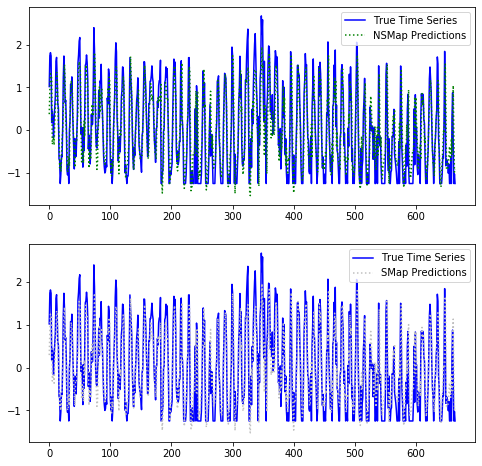

In [44]:
figLOU, axLOU = plt.subplots(2, figsize=(8,8))
axLOU[0].plot(Yn, c="blue", label="True Time Series")
axLOU[0].plot(predictedTSNS, c="green", linestyle="dotted", label="NSMap Predictions")
axLOU[0].legend()

axLOU[1].plot(Ys, c="blue", label="True Time Series")
axLOU[1].plot(predictedTSS, c="silver", linestyle="dotted", label="SMap Predictions")
axLOU[1].legend()
plt.show()

In [31]:
AICNS = AIC(Xn, Yn, txn, thetaNS, deltaNS)
AICS = AIC(Xs, Ys, txs, thetaS, 0)

In [32]:
sequentialNS = sequential(Xn, Yn, txn, thetaNS, deltaNS,return_error=False)
sequentialS = sequential(Xs, Ys, txs, thetaS, 0,return_error=False)

YseqNS = Yn[int(Yn.shape[0]/2):]
YseqS = Ys[int(Ys.shape[0]/2):]

In [33]:
MSEseqNS = np.mean((sequentialNS-YseqNS)**2)
MSEseqS = np.mean((sequentialS-YseqS)**2)

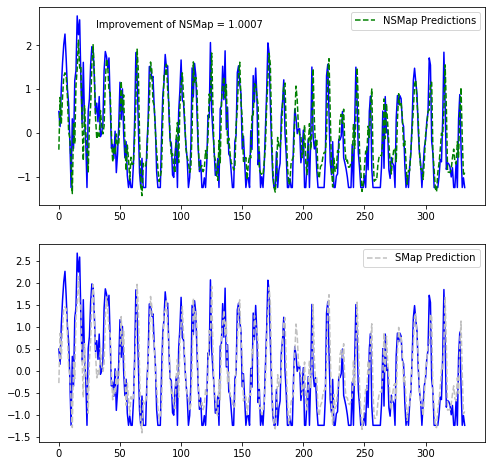

In [42]:
fig, ax = plt.subplots(2, figsize=(8,8))
ax[0].plot(Yn[int(Yn.shape[0]/2):], color="blue")
ax[0].plot(sequentialNS, color="green", linestyle="dashed", label="NSMap Predictions")
ax[0].text(30,2.4,f"Improvement of NSMap = {MSEseqS/MSEseqNS:.4f}")
ax[0].legend()

ax[1].plot(Ys[int(Ys.shape[0]/2):], color="blue")
ax[1].plot(sequentialS, color="silver", linestyle="dashed", label="SMap Prediction")
ax[1].legend()

plt.show()

In [35]:
### SUMMARY ###

print(f"NSMap -- theta: {thetaNS:.3f}, delta: {deltaNS:.7f}, AIC: {AICNS:.3f}, log Likelihood: {llikelihoodNS:.3f}, Optimal Embedding Dimension: {lagsNS+2}, 10% Weight Dropoff: {np.exp(-deltaNS*0.1**2)}")
print(f"SMap -- theta: {thetaS:.3f}, AIC: {AICS:.3f}, log Likelihood: {llikelihoodS:.3f}, Optimal Embedding Dimension: {lagsS+2}")

print(f"Improvement of NSMap(leave one out): {MSElooS/MSElooNS:.3f}")
print(f"Improvement of NSMap(sequentially calculated): {MSEseqS/MSEseqNS:.3f}")

print(f"NSMap dof: {dofNS:.3f}")
print(f"SMap dof: {dofS:.3f}")

AkaikeTest(AICS, AICNS)

NSMap -- theta: 0.619, delta: 1.1625869, AIC: 1281.309, log Likelihood: -613.434, Optimal Embedding Dimension: 8, 10% Weight Dropoff: 0.98844145021896
SMap -- theta: 0.752, AIC: 1280.044, log Likelihood: -614.977, Optimal Embedding Dimension: 8
Improvement of NSMap(leave one out): 1.008
Improvement of NSMap(sequentially calculated): 1.001
NSMap dof: 27.220
SMap dof: 25.045
Probability NSMap beats SMap:  0.5312567624119767


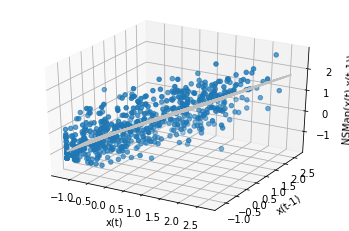

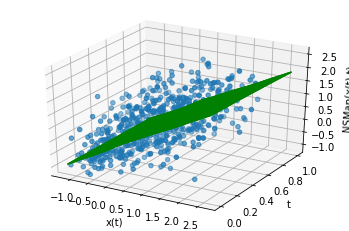

In [43]:
functionSurfaceSMap(Xr, 1, thetaS, 50)
functionSurfaceNSMap(Xr, 1, thetaNS, deltaNS, 50)

In [93]:
# do SFA
"""
Xstd = standardize(X)
basisExpanded = nonlinearBasisExpand(Xstd)

# whitening - this is independent of the order of the values, so we can safely drop any NAs
NAsRemoved = basisExpanded[~np.any(np.isnan(basisExpanded),axis=1)]

U, S, V = la.svd(NAsRemoved)
whitened = U[:,:V.shape[0]] @ V

whitenedVal, whitenedVec = la.eigh(np.cov(NAsRemoved.T,bias=False))
whitened = NAsRemoved @ (whitenedVec @ np.diag((whitenedVal+1e-7) ** -0.5))


print("Mean Test : ", np.mean(whitened))
print("Covariance Test : \n",np.cov(whitened.T))

derivatives = whitened[1:,:] - whitened[:-1,:]
colors, spectrum = la.eigh(np.cov(derivatives, rowvar=False))

print("Colors = ",colors)
"""

'\nXstd = standardize(X)\nbasisExpanded = nonlinearBasisExpand(Xstd)\n\n# whitening - this is independent of the order of the values, so we can safely drop any NAs\nNAsRemoved = basisExpanded[~np.any(np.isnan(basisExpanded),axis=1)]\n\nU, S, V = la.svd(NAsRemoved)\nwhitened = U[:,:V.shape[0]] @ V\n\nwhitenedVal, whitenedVec = la.eigh(np.cov(NAsRemoved.T,bias=False))\nwhitened = NAsRemoved @ (whitenedVec @ np.diag((whitenedVal+1e-7) ** -0.5))\n\n\nprint("Mean Test : ", np.mean(whitened))\nprint("Covariance Test : \n",np.cov(whitened.T))\n\nderivatives = whitened[1:,:] - whitened[:-1,:]\ncolors, spectrum = la.eigh(np.cov(derivatives, rowvar=False))\n\nprint("Colors = ",colors)\n'

In [13]:
basisExpanded = nonlinearBasisExpand(X)
# basisExpandedSt = standardize(basisExpanded)
basisExpandedSt = basisExpanded - np.mean(basisExpanded[np.isfinite(basisExpanded)],axis=0)
print("NA Rows = ",np.sum(np.any(np.isnan(basisExpandedSt),axis=1)), basisExpandedSt.shape)

basisExpandedStNoNas = basisExpanded[np.all(np.isfinite(basisExpanded),axis=1)]

# Whitening!

# SVD Version - seems to be more numerically unstable than PCA, which is strange. Will use PCA for now but I should revist this
"""
U, S, V = la.svd(basisExpandedStNoNas)
whitened = basisExpandedSt @ V.T @ np.diag(1/S)

whitenedNoNas = whitened[np.all(np.isfinite(whitened),axis = 1)]

print("NA rows = ", np.sum(np.any(np.isnan(whitened),axis=1)), whitened.shape)
"""
# PCA Version
covPCA = np.cov(basisExpandedStNoNas.T) # cov is non nan
eigValPCA, eigVecPCA = la.eigh(covPCA)
print("PCA eigenvals(many 0 values suggest high redundancy in data) : \n",eigValPCA)

whitened = basisExpandedSt @ (eigVecPCA @ np.diag((eigValPCA+1e-7) ** -0.5))
whitenedNoNas = whitened[np.all(np.isfinite(whitened),axis = 1)]

"""
c = np.cov(zprime.T, bias=False, rowvar=True)
print("NAs = ", np.sum(np.isnan(c)))
# print("Covariance = ", c, c.shape)

eigval, eigvec = la.eigh(c)
# print("Eigenstuff = ", eigval, eigvec)
print("Eigenvals(shouldn't be near 0) ", eigval)

diagEigVal = np.diag((eigval+1e-7) ** -0.5)

print(zprime.shape, diagEigVal.shape, eigvec.T.shape)
z = zprime @ (eigvec @ diagEigVal)
"""
# print("z = ", z)
print("Mean test(should be 0)", np.mean(whitenedNoNas))
print("Covariance test(should be I): \n", np.cov(whitenedNoNas.T))
# print("Covariance test(should be I): \n", np.cov(whitened.T))

# Another PCA on derivatives
dWhiteneddt = whitened[1:,:] - whitened[:-1,:]
covdWhiteneddt = np.cov(dWhiteneddt[np.all(np.isfinite(dWhiteneddt),axis=1)].T)
colors, spectrum = la.eigh(covdWhiteneddt)

a = spectrum[:,np.argsort(colors)[0]] # eigVecDot.sort(key=eigValDot)[0]
# print(a)
yt = whitened @ a
print(a.shape, whitened.shape)


NA Rows =  40 (473, 20)
PCA eigenvals(many 0 values suggest high redundancy in data) : 
 [ 0.0836  0.093   0.1378  0.1412  0.2262  0.2457  0.2582  0.3548  0.3644
  0.4436  0.6461  0.8241  0.9743  1.3691  1.9141  2.4277  2.7668  3.4758
  7.1548 16.952 ]
Mean test(should be 0) -0.08597165833419998
Covariance test(should be I): 
 [[ 1.  0. -0.  0. -0.  0.  0. -0. -0. -0. -0.  0. -0. -0. -0. -0.  0.  0.
  -0. -0.]
 [ 0.  1. -0. -0.  0.  0. -0. -0.  0. -0. -0. -0. -0.  0.  0.  0. -0. -0.
  -0.  0.]
 [-0. -0.  1.  0.  0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.
  -0. -0.]
 [ 0. -0.  0.  1.  0. -0.  0. -0. -0.  0.  0. -0. -0. -0. -0.  0.  0.  0.
  -0. -0.]
 [-0.  0.  0.  0.  1.  0.  0. -0. -0.  0.  0.  0.  0.  0. -0. -0.  0. -0.
   0.  0.]
 [ 0.  0.  0. -0.  0.  1. -0.  0.  0.  0. -0. -0.  0. -0.  0.  0. -0.  0.
  -0. -0.]
 [ 0. -0.  0.  0.  0. -0.  1. -0. -0. -0. -0. -0. -0.  0.  0.  0.  0. -0.
  -0.  0.]
 [-0. -0.  0. -0. -0.  0. -0.  1. -0. -0. -0.  0. -0.  0.  0. -0.  0.  0.
  

<IPython.core.display.Javascript object>


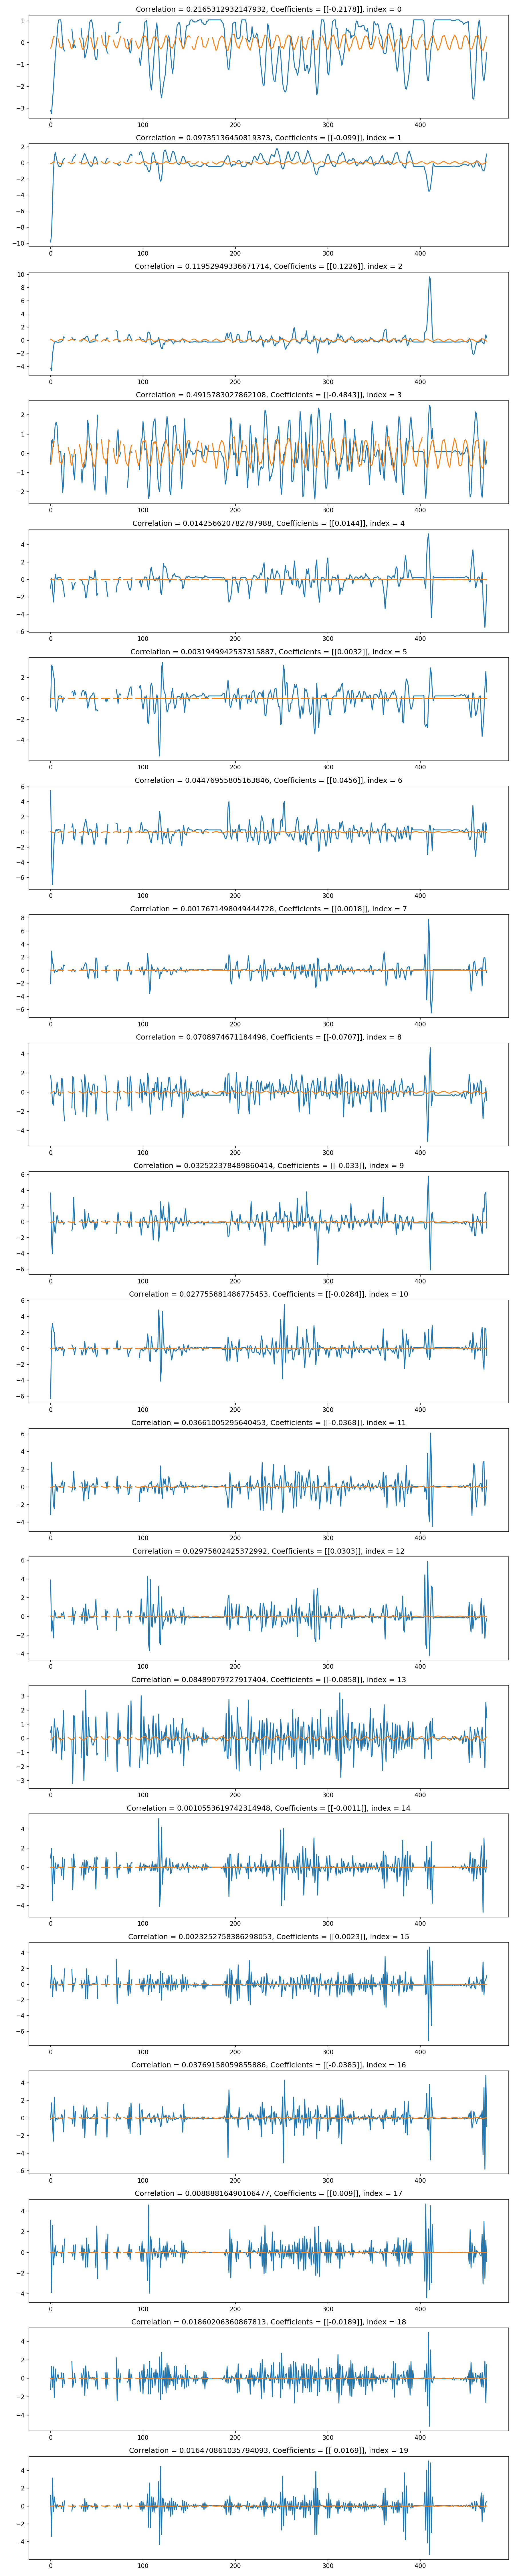

In [14]:
figSpectrum, axSpectrum = plt.subplots(len(colors), figsize=(12,3*len(colors)))

for i in range(len(colors)):
    projection = spectrum[:,i] @ whitened.T
    projectionSt = standardize(projection)
    
    k, sim = linearSimilarity(driver, projectionSt)
    
    axSpectrum[i].plot( projectionSt )
    axSpectrum[i].plot( driver @ k ,c="tab:orange")
    axSpectrum[i].set_title("Correlation = {c}, Coefficients = {K}, index = {I}".format(c=sim,K=k,I=i))
    
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


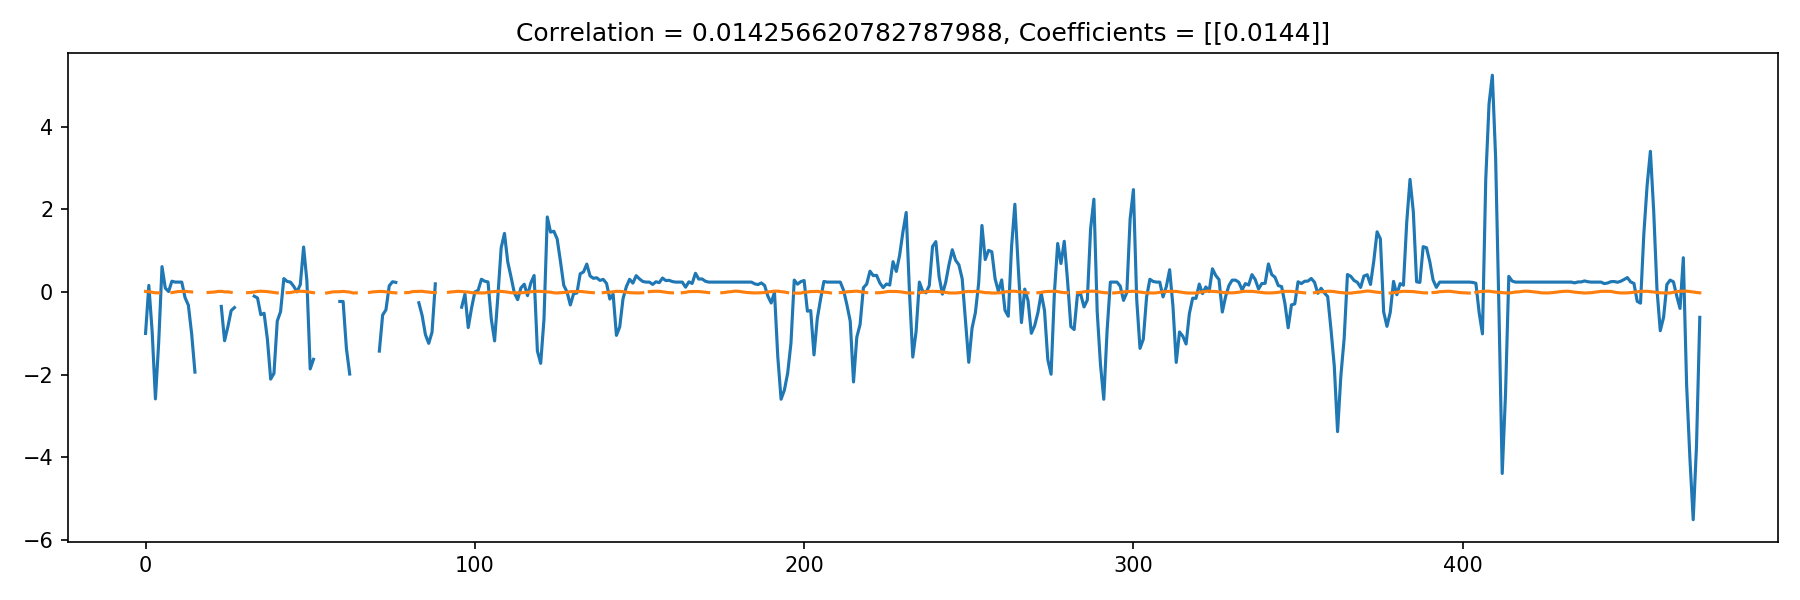

In [15]:
singleGraphIndex = 4

figSpectrum, axSpectrum = plt.subplots(1, figsize=(12,4))

projection = spectrum[:,singleGraphIndex] @ whitened.T
projectionSt = standardize(projection)

k, sim = linearSimilarity(driver, projectionSt)

axSpectrum.plot( projectionSt )
axSpectrum.plot( driver @ k ,c="tab:orange")
axSpectrum.set_title("Correlation = {c}, Coefficients = {K}".format(c=sim,K=k))
    
plt.tight_layout()
plt.show()

#### 